**Summary:**

1. The use of Google's Gemini Pro model
2. Implementation through the LangChain framework
3. Demonstration of multiple capabilities (text generation, image recognition, and RAG)
4. The specific application of RAG for extracting information from PDFs to answer queries

**Keywords:**

Artificial intelligence(AI), Deep Learning, Large Language Model(LLM), Generative AI, Retrieval Augmented Generation(RAG)

**Terminologies:**


**1.   Large Language Models:** Refers to general purpose language models that can be pre-trained and then fine-tuned for specific purposes. Mainly, they are trained to solve common language problems. For example, Text Classification, Question Answering, Document Summarization, Text Generation etc.

**2.   Generative AI(GenAI):** Generative AI is a type of Artificial Intelligence that creates new content based on what it has learnt from existing content.

OR

Generative AI is a Artificial Intelligence technology capable of generating various type of content, including text, imagery, audio, synthetic data.

**3.   Retrieval Augmented Generation(RAG):** RAG is a process of retrieving data from outside a foundation model and argument your prompts, which is a natural language text that requests the LLM to perform a specific task by adding the relevant retrieved data in context.

**4.   Embedding models:** Embedding refers to transforming data like text, images, audio into numerical representation in a high dimensional vector space using Machine Learning(ML) algorithms.

**5.   LangChain:** LangChain is an advanced framework designed for creating applications powered by LLMs. It provides a suit of tools and abstraction to streamline the development process of LLM based application.

**6.   Prompts:** The prompt is a short piece of text that is given to LLM as an input, and it can be used to control the output of the model in a variety of ways.






**#code**

In [ ]:
#install necessary dependencies (1. google-generativeai, 2. langchain-google-genai, 3. chromadb, 4. pypdf)
!pip install -q --upgrade google-generativeai langchain-google-genai chromadb pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.3/717.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
#install utility functions for better output visualization(1. display, 2. markdown)
from IPython.display import display, Markdown
#import textwrap for formatting and manipulating plane text
import textwrap
#create a function which will format the text
def to_markdown(text):
  text = text.replace('•', '*')
  return Markdown(textwrap.indent(text, '>', predicate = lambda _: True))

In [ ]:
# now import genai from google-generativeai
import google.generativeai as genai
#import google collabs inherit library to use google's gemini api key
from google.colab import userdata

In [ ]:
import os
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key = GOOGLE_API_KEY)
type(GOOGLE_API_KEY)

str

In [ ]:
#lets initialise Google's foundational model and generate some content
model = genai.GenerativeModel(model_name="gemini-pro")
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

**Text Generation**

In [ ]:
#to generate content using Gemini only we can use "response = model.generate.content("pass_query")" and then format it as "to_markdown(response.text)"

In [ ]:
#as we're using langchain to build our RAG application again we've to assign Google api key here as follows
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=GOOGLE_API_KEY)

In [ ]:
#passing queries to llm
result = llm.invoke("Define LangChain.")
#use markdown function to format generated outcome/result
to_markdown(result.content)

>**LangChain** is a large-scale generative language model released by Google AI in 2023. It is designed to understand and generate text in a wide range of languages, including English, Chinese, French, German, Spanish, and Japanese.
>
>**Key Features:**
>
>* **Multilingual:** Can process and generate text in over 100 languages.
>* **Massive Size:** Trained on a dataset of over 138 billion tokens, making it one of the largest language models to date.
>* **Advanced Architecture:** Utilizes a Transformer-based neural network architecture with over 175 billion parameters.
>* **Wide Applications:** Can be used for various natural language processing tasks, including translation, text summarization, question answering, and dialogue generation.
>* **Cross-Lingual Transfer:** Can transfer knowledge and generalize to languages that were not explicitly included in its training data.
>
>**Benefits:**
>
>* **Enhanced Language Understanding:** Can comprehend complex text and extract meaningful insights.
>* **Improved Text Generation:** Generates fluent, grammatically correct text that is indistinguishable from human-written content.
>* **Efficient Translation:** Provides high-quality translations between multiple languages.
>* **Versatile Tool:** Can be applied to a wide range of applications, from customer service chatbots to document summarization.
>
>**Applications:**
>
>LangChain has been used in various applications, including:
>
>* Machine Translation
>* Text Summarization
>* Question Answering
>* Dialogue Generation
>* Language Learning
>* Natural Language Understanding

**Image Recognization**

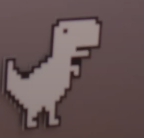

In [ ]:
#import python imaging library for image processing
import PIL.Image
img = PIL.Image.open('image.png')
img

In [ ]:
#our aim is to describe this image
#to describe this image We simply need to pass a message
from langchain_core.messages import HumanMessage
#to send messages to and receive responses from a Google Generative AI model within the LangChain
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
#lets select relevant model for image processing (gemini vision pro)
llm = ChatGoogleGenerativeAI(model = "gemini-pro-vision", google_api_key=GOOGLE_API_KEY)

In [ ]:
#design message and send it to llm to get the response
message  = HumanMessage(
    content=[
        {
            "type": "text",
            "text": " Write a short description about the attached image",
        },
        {"type": "image_url", "image_url": "image.png"},
    ]
)
result = llm.invoke([message])
to_markdown(result.content)

> This is an 8-bit image of a dinosaur. It is white with black outlines. It is standing on two legs and has its arms in the air. Its mouth is open and it has a surprised expression on its face. It is the icon that is displayed in the Google Chrome web browser when there is no internet connection.

**Interact with document using Retrieval Augmented Generation(RAG)**

In [ ]:
#To perform operation on document, In our case PDF
#1. We will divide the pdf into chunk of text
#2. Then we will generate the embeddings of these chunk of text using Google generative AI text embeddings
#3. All the generated text embeddings will be stored into vector database
#4. Then the query will be performed and embedded
#5. After that similarity/symantic search will be performed using vector database's similarity search
#6. Retriever will retrieve set of text or a sentences which are similar or matches context of the query
#7. This retrieved data/text/sentences will be passed to the LLM along with actual query/question
#8. Lastly LLM will generate concise and grammatically correct answer for that respective question

In [ ]:
#In order to work with RAG we need to install respective dependencies
#Tesseract OCR is an open-source Optical Character Recognition (OCR) engine maintained by Google.
#It is widely used for extracting text from images, including scanned documents, photographs, and screenshots.
#Tesseract OCR is highly accurate and supports various languages and file formats.
!sudo apt -y -qq install tesseract-ocr libtesseract-dev

!sudo apt-get -y -qq install poppler-utils libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig

!pip install langchain


The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 121925 files and directories

In [ ]:
!pip install langchain_community
#Useful for fetching data from URLs, parsing URLs, and handling web-related operations within Python applications
import urllib
#Helpful for managing and responding to warnings generated during program execution, ensuring smooth operation and debugging
import warnings
#pathlib provides an object-oriented approach to working with filesystem paths in Python
from pathlib import Path as p
#pprint enhances the output of data structures, improving readability for complex nested objects during development and debugging.
from pprint import pprint

import pandas as pd
#PromptTemplate class is used for defining and managing templates or patterns for generating prompts or messages
#It includes methods for formatting and customizing prompts based on variables or conditions.
from langchain import PromptTemplate
#load_qa_chain this function is expected to handle the loading or initialization of a question answering (QA) chain,
#which is a specific configuration or pipeline for processing and responding to questions.
from langchain.chains.question_answering import load_qa_chain
#for efficiently loading and extracting text from PDF documents
from langchain_community.document_loaders import PyPDFLoader
#for recursively splitting text into smaller segments based on characters or other criteria
from langchain.text_splitter import RecursiveCharacterTextSplitter
#vectorstores contains classes or functions related to storing and managing vector representations of text or other data
#Chroma handles the storage, retrieval, and management of vector data in an efficient manner
from langchain.vectorstores import Chroma
#RetrievalQA combines retrieval mechanisms with question-answering capabilities
#enabling the system to find and provide answers from a knowledge base or dataset
from langchain.chains import RetrievalQA
#filterwarnings function allows you to specify which warnings should be ignored, displayed, or treated as errors
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 7.1 MB/s eta 0:00:00


In [ ]:
import os
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key = GOOGLE_API_KEY)
type(GOOGLE_API_KEY)

In [ ]:
#install, select model and api key
!pip install langchain-google-genai
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model = "gemini-pro", google_api_key = GOOGLE_API_KEY, temperature = .3, convert_system_message_to_human = True)
#temperature controls the randomness of the data and convert_system_message_to_human converts system messages into a human-readable format, making interactions more user-friendly

**Extract text from PDF**

In [ ]:
pdf_loader = PyPDFLoader("/content/NIPS-2017-attention-is-all-you-need-Paper.pdf")
pages = pdf_loader.load_and_split()
print(pages[3].page_content)

Figure 1: The Transformer - model architecture.
wise fully connected feed-forward network. We employ a residual connection [ 10] around each of
the two sub-layers, followed by layer normalization [ 1]. That is, the output of each sub-layer is
LayerNorm( x+ Sublayer( x)), where Sublayer(x)is the function implemented by the sub-layer
itself. To facilitate these residual connections, all sub-layers in the model, as well as the embedding
layers, produce outputs of dimension dmodel = 512 .
Decoder: The decoder is also composed of a stack of N= 6identical layers. In addition to the two
sub-layers in each encoder layer, the decoder inserts a third sub-layer, which performs multi-head
attention over the output of the encoder stack. Similar to the encoder, we employ residual connections
around each of the sub-layers, followed by layer normalization. We also modify the self-attention
sub-layer in the decoder stack to prevent positions from attending to subsequent positions. This
masking, combine

In [ ]:
len(pages)

12

**RAG Pipeline : Embeddings + Gemini(LLM)**

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 10000, chunk_overlap = 1000)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)
#RecursiveCharacterTextSplitter class is responsible for splitting text into smaller chunks based on character count, allowing for more manageable segments of text for processing
#chunk_size = 10000 means that each chunk will contain up to 10,000 characters
#chunk_overlap = 1000 means that there will be a 1,000 character overlap between each chunk. This overlap can help maintain context between chunks

In [ ]:
#initializing an instance of GoogleGenerativeAIEmbeddings with specific parameters
embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001", google_api_key = GOOGLE_API_KEY)

In [ ]:
#use vector database and pass all the chunk of text and embedding model
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs = {"k": 4})
#search_kwargs = {"k": 8} tells while doing similarity search only return 8 documents not more that that

In [ ]:
#RetrievalQA = Retrieval question answer
#allows for the effective generation of answers to queries, along with the retrieval of relevant source documents for transparency and verification
qa_chain = RetrievalQA.from_chain_type(model, chain_type = "stuff", retriever = vector_index, return_source_documents = True)

In [ ]:
#a simple question/query is passed to qa_chain and then closest documents have been retrieved to answer the question
question = "What is the main focus of the paper? and What is multi-head attention layer?"
result = qa_chain({"query": question})
Markdown(result ["result"])

**Main Focus of the Paper**

The main focus of the paper is to introduce the Transformer, a novel neural network architecture for sequence transduction tasks that relies solely on attention mechanisms, dispensing with recurrence and convolutions entirely. The Transformer achieves state-of-the-art results on machine translation tasks, outperforming existing models in both quality and efficiency.

**Multi-Head Attention Layer**

A multi-head attention layer is a type of attention mechanism that consists of several parallel attention heads. Each attention head computes a weighted sum of the values, where the weights are computed by a compatibility function of the query with the corresponding key. The outputs of the attention heads are then concatenated and projected to produce the final output of the multi-head attention layer.

Multi-head attention allows the model to jointly attend to information from different representation subspaces at different positions. This is beneficial because it allows the model to capture different types of relationships between the elements of the sequence.

In [ ]:
#fetch source documents for above answer
result["source_documents"]

[Document(page_content='Scaled Dot-Product Attention\n Multi-Head Attention\nFigure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several\nattention layers running in parallel.\nquery with all keys, divide each by√dk, and apply a softmax function to obtain the weights on the\nvalues.\nIn practice, we compute the attention function on a set of queries simultaneously, packed together\ninto a matrix Q. The keys and values are also packed together into matrices KandV. We compute\nthe matrix of outputs as:\nAttention(Q,K,V ) = softmax(QKT\n√dk)V (1)\nThe two most commonly used attention functions are additive attention [ 2], and dot-product (multi-\nplicative) attention. Dot-product attention is identical to our algorithm, except for the scaling factor\nof1√dk. Additive attention computes the compatibility function using a feed-forward network with\na single hidden layer. While the two are similar in theoretical complexity, dot-product attention is\nmuch f

In [ ]:
 #let's design a custom prompt using templete in order to generate the answer
template = """1. Use the following pieces of context to answer the question at the end.
2. If you have no idea or don't know the answer, just say that this knowledge is out of my context and apologise, don't try to make up an answer.
3. Keep the results as precise as possible. Always say " Anything else I can help you with?" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)#passing generated prompt
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [ ]:
#now pass the same question as asked earlier to the RAG model but with our custom prompt
question = "What is the main focus of the paper? and What is multi-head attention layer?"
result = qa_chain({"query": question})
Markdown(result ["result"])

1. The main focus of the paper is to introduce the Transformer, a novel neural network architecture for sequence transduction tasks that relies solely on attention mechanisms, dispensing with recurrence and convolutions entirely. The Transformer achieves state-of-the-art results on two machine translation tasks, demonstrating its superiority in quality while being more parallelizable and requiring significantly less time to train.

2. Multi-head attention layer is a key component of the Transformer architecture. It consists of multiple attention heads, each of which performs a scaled dot-product attention operation on different linear projections of the queries, keys, and values. The outputs of the attention heads are then concatenated and projected to obtain the final output of the multi-head attention layer. This mechanism allows the model to attend to different subspaces of the input and output sequences, capturing diverse types of dependencies.
Anything else I can help you with?

In [ ]:
#check if it provides results outside the context/source data
question = "What is Overfitting and underfitting?"
result = qa_chain({"query": question})
Markdown(result ["result"])

This knowledge is out of my context, I apologize for not being able to answer this question. Anything else I can help you with?

**EOF**